In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

file_path = 'fashion_products_data.ldjson'  
data = pd.read_json(file_path, lines=True)


In [83]:
print("First few rows of the data:")
print(data.head())

First few rows of the data:
                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...  

In [84]:
print("\nData summary:")
print(data.info())


Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_price                    27110 non-null  float64
 11  weight                         30000 non-null  object 
 12  rating                         

In [85]:

print("\nDescriptive statistics for numeric columns:")
print(data.describe())


Descriptive statistics for numeric columns:
         browsenode   sales_price        rating  no__of_reviews  \
count  2.948000e+04  27110.000000  30000.000000     3452.000000   
mean   2.898248e+09    862.172397      4.039857      136.642236   
std    3.050401e+09    964.223008      0.840009      525.484988   
min    1.953148e+09     39.000000      1.000000        1.000000   
25%    1.968067e+09    379.000000      3.500000        4.000000   
50%    1.968135e+09    590.000000      4.000000       15.000000   
75%    1.968444e+09    899.000000      4.900000       72.000000   
max    1.751625e+10   9988.000000      5.000000     9896.000000   

       left_in_stock  no__of_offers  no__of_sellers  
count    3057.000000    1020.000000     1020.000000  
mean        2.091920       6.230392        6.230392  
std         1.317071      16.919507       16.919507  
min         1.000000       1.000000        1.000000  
25%         1.000000       1.000000        1.000000  
50%         2.000000       

In [86]:
print("\nChecking for missing values:")
print(data.isnull().sum())

print("\n\n\nNon-null counts:")
print(data.notnull().sum())

print("\nPercentage of missing values:")
print((data.isnull().mean() * 100).round(2))


Checking for missing values:
uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews                   2

In [87]:
data = data.dropna(axis=1, how='all')
data = data.drop(columns=['name_of_author_for_books'])
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews                   2

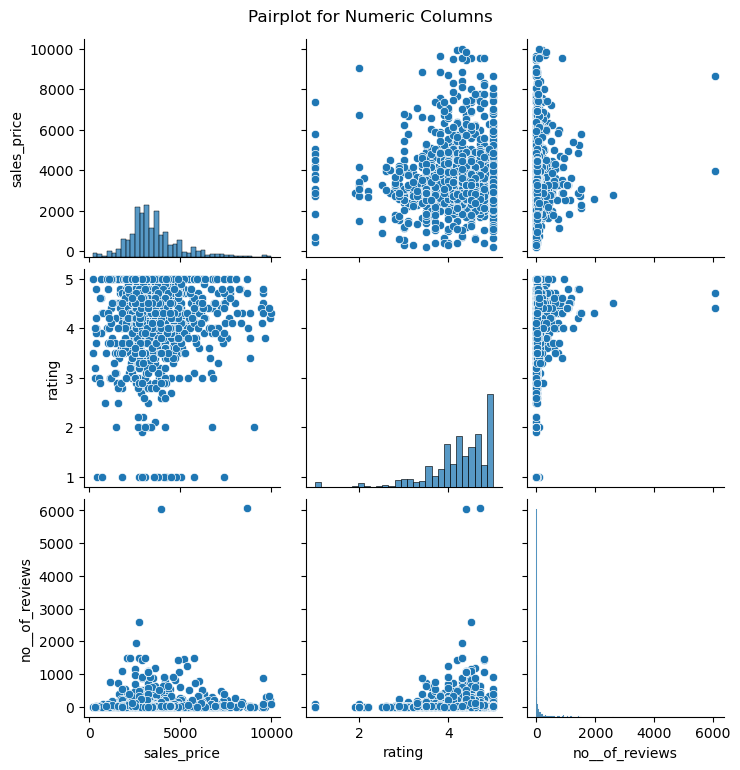

In [88]:
numeric_columns = ['sales_price', 'rating', 'no__of_reviews']  # Customize as necessary
numeric_columns = [col for col in numeric_columns if col in data.columns]
if len(numeric_columns) > 1:
    sns.pairplot(data[numeric_columns].dropna())
    plt.suptitle("Pairplot for Numeric Columns", y=1.02)
    plt.show()

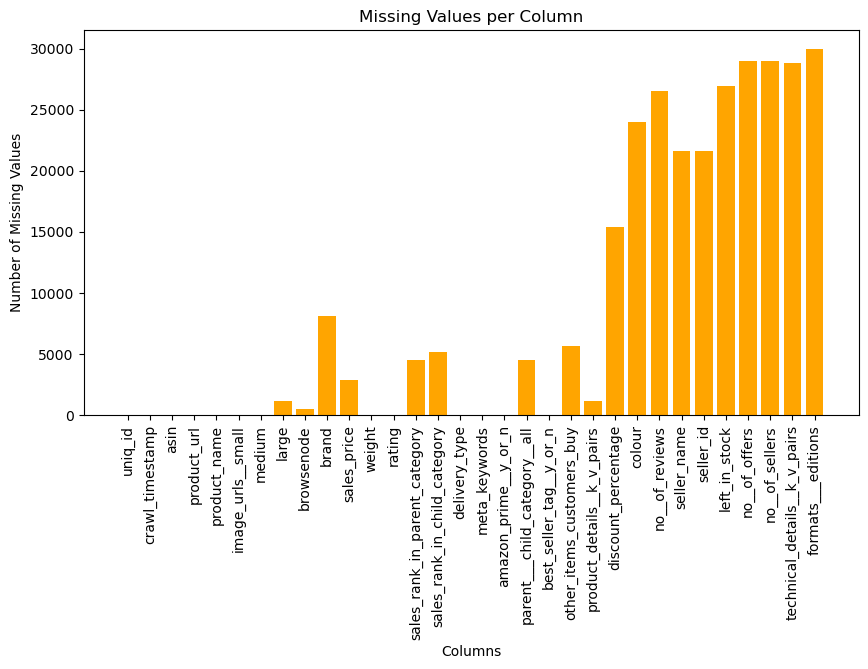

In [89]:
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index, missing_values.values, color='orange')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.show()


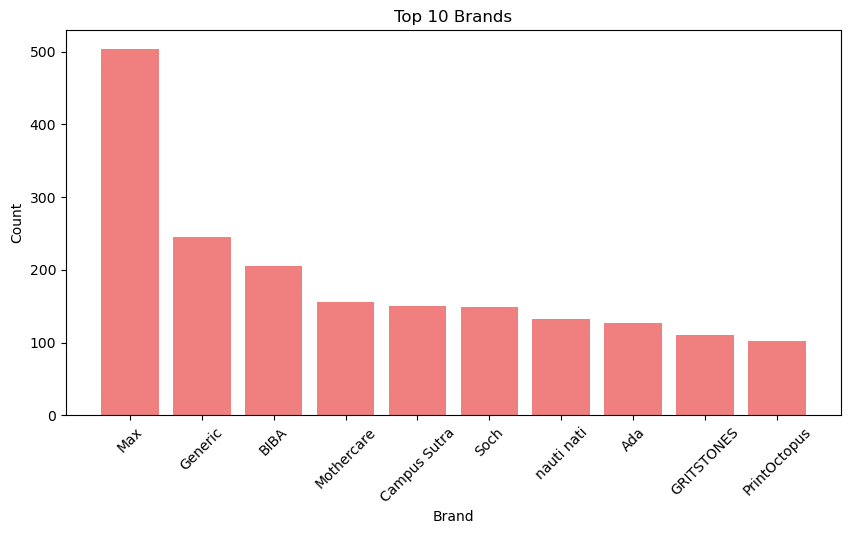

In [90]:
top_brands = data['brand'].value_counts().head(10)  # Top 10 brands
plt.figure(figsize=(10, 5))
plt.bar(top_brands.index, top_brands.values, color='lightcoral')
plt.title("Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

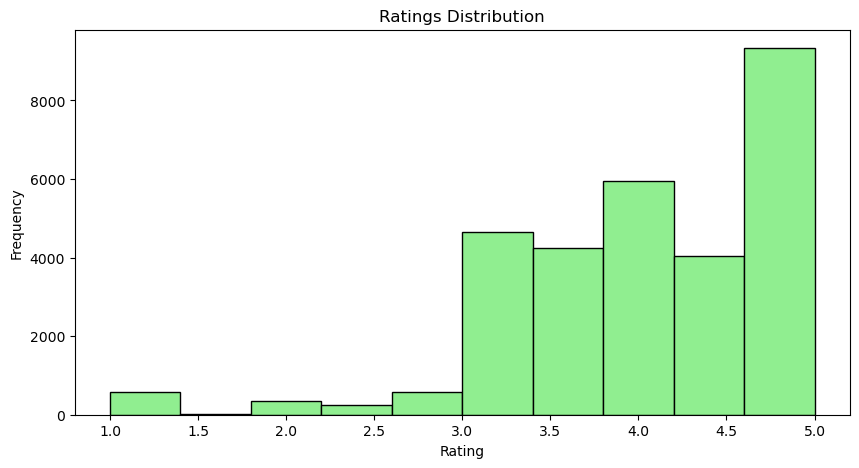

In [91]:

if 'rating' in data.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data['rating'].dropna(), bins=10, color='lightgreen', edgecolor='black')
    plt.title("Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No 'rating' column found.")

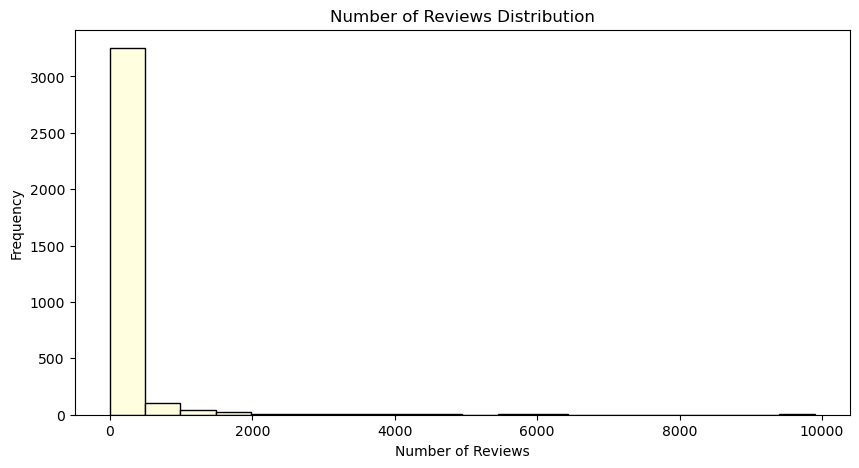

In [92]:
if 'no__of_reviews' in data.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data['no__of_reviews'].dropna(), bins=20, color='lightyellow', edgecolor='black')
    plt.title("Number of Reviews Distribution")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No 'no__of_reviews' column found.")

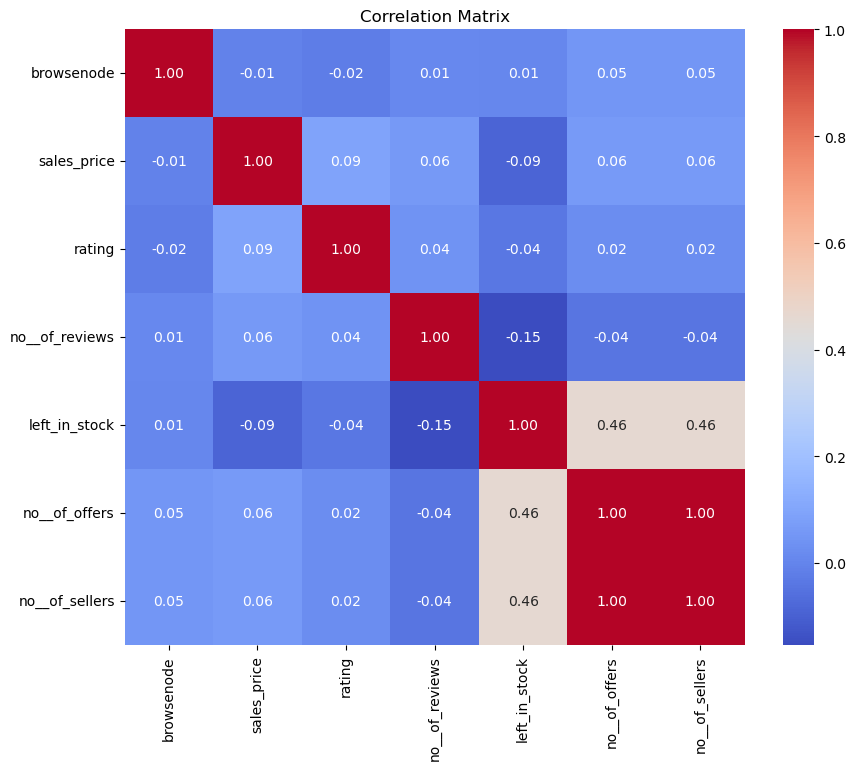

In [93]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = data.select_dtypes(include='number').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [94]:
columns_to_keep = ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']

# Filter the dataset to keep only the specified columns
data = data[columns_to_keep]

# Display the first few rows of the updated dataset
print(data.head())

         asin                                        product_url  \
0  B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4  B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  sales_price  rating  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3           People Men's Printed Regular fit T-Shirt        195.0     3.0   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   

                                       meta_keywords  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By P

In [95]:
print("\nChecking for missing values:")
print(data.isnull().sum())
print("\nPercentage of missing values:")
print((data.isnull().mean() * 100).round(2))


Checking for missing values:
asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
dtype: int64

Percentage of missing values:
asin              0.00
product_url       0.00
product_name      0.00
sales_price       9.63
rating            0.00
meta_keywords     0.00
medium            0.01
brand            27.14
dtype: float64


In [96]:
# Impute 'sales_price' with the median
data['sales_price'] = data['sales_price'].fillna(data['sales_price'].median())

# Impute 'brand' with "Unknown"
data['brand'] = data['brand'].fillna("Unknown")
data

asin                                        product_url  \
0      B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1      B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2      B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3      B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4      B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   
...           ...                                                ...   
29995  B07FVRMFTX  https://www.amazon.in/Indian-Virasat-Pushp-Cha...   
29996  B07RR3XYZD  https://www.amazon.in/Urban-Ranger-Pantaloons-...   
29997  B07SSLSR9X  https://www.amazon.in/Peter-England-Striped-Re...   
29998  B07P561W67  https://www.amazon.in/PINKY-PARI-Womens-Embroi...   
29999  B07GPQ7V5W  https://www.amazon.in/Gutsy-Triple-Striped-Sle...   

                                            product_name  sales_price  rating  \
0      LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1      Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2      LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3               People Men's Printed Regular fit T-Shirt        195.0     3.0   
4      Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   
...                                                  ...          ...     ...   
29995        Indian Virasat Women's Rayon Anarkali Kurta        899.0     5.0   
29996  Urban Ranger by Pantaloons Men's Slim fit T-Shirt        204.0     3.0   
29997            Peter England Men's Regular fit T-Shirt        399.0     4.0   
29998  PINKY PARI Women's Embroidered Short Denim Str...        799.0     4.0   
29999  Gutsy Men's Full Sleeve All Over Printed Navy ...        359.0     4.0   

                                           meta_keywords  \
0      LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1      Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2      LOVISTA Cotton Gota Patti Tassel Traditional P...   
3        People Men's Printed Regular fit T-Shirt,People   
4      Monte Carlo Grey Solid Cotton Blend Polo Colla...   
...                                                  ...   
29995        Indian Virasat Women's Rayon Anarkali Kurta   
29996  Urban Ranger by Pantaloons Men's Slim fit T-Sh...   
29997      Peter England Men's Regular fit T-Shirt,Abfrl   
29998  PINKY PARI Women's Embroidered Short Denim Str...   
29999  Gutsy Men's Full Sleeve All Over Printed Navy ...   

                                                  medium  \
0      https://images-na.ssl-images-amazon.com/images...   
1      https://images-na.ssl-images-amazon.com/images...   
2      https://images-na.ssl-images-amazon.com/images...   
3      https://images-na.ssl-images-amazon.com/images...   
4      https://images-na.ssl-images-amazon.com/images...   
...                                                  ...   
29995  https://images-na.ssl-images-amazon.com/images...   
29996  https://images-na.ssl-images-amazon.com/images...   
29997  https://images-na.ssl-images-amazon.com/images...   
29998  https://images-na.ssl-images-amazon.com/images...   
29999  https://images-na.ssl-images-amazon.com/images...   

                            brand  
0                       LA' Facon  
1                         Unknown  
2                         LOVISTA  
3                         Unknown  
4                         Unknown  
...                           ...  
29995                     Unknown  
29996  Urban Ranger by Pantaloons  
29997                     Unknown  
29998                  PINKY PARI  
29999                       Gutsy  

[30000 rows x 8 columns]

In [97]:
# Impute 'sales_price' with the median
data['sales_price'] = data['sales_price'].fillna(data['sales_price'].median())

# Impute 'brand' with "Unknown"
data['brand'] = data['brand'].fillna("Unknown")
data


asin                                        product_url  \
0      B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1      B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2      B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3      B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4      B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   
...           ...                                                ...   
29995  B07FVRMFTX  https://www.amazon.in/Indian-Virasat-Pushp-Cha...   
29996  B07RR3XYZD  https://www.amazon.in/Urban-Ranger-Pantaloons-...   
29997  B07SSLSR9X  https://www.amazon.in/Peter-England-Striped-Re...   
29998  B07P561W67  https://www.amazon.in/PINKY-PARI-Womens-Embroi...   
29999  B07GPQ7V5W  https://www.amazon.in/Gutsy-Triple-Striped-Sle...   

                                            product_name  sales_price  rating  \
0      LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1      Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2      LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3               People Men's Printed Regular fit T-Shirt        195.0     3.0   
4      Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   
...                                                  ...          ...     ...   
29995        Indian Virasat Women's Rayon Anarkali Kurta        899.0     5.0   
29996  Urban Ranger by Pantaloons Men's Slim fit T-Shirt        204.0     3.0   
29997            Peter England Men's Regular fit T-Shirt        399.0     4.0   
29998  PINKY PARI Women's Embroidered Short Denim Str...        799.0     4.0   
29999  Gutsy Men's Full Sleeve All Over Printed Navy ...        359.0     4.0   

                                           meta_keywords  \
0      LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1      Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2      LOVISTA Cotton Gota Patti Tassel Traditional P...   
3        People Men's Printed Regular fit T-Shirt,People   
4      Monte Carlo Grey Solid Cotton Blend Polo Colla...   
...                                                  ...   
29995        Indian Virasat Women's Rayon Anarkali Kurta   
29996  Urban Ranger by Pantaloons Men's Slim fit T-Sh...   
29997      Peter England Men's Regular fit T-Shirt,Abfrl   
29998  PINKY PARI Women's Embroidered Short Denim Str...   
29999  Gutsy Men's Full Sleeve All Over Printed Navy ...   

                                                  medium  \
0      https://images-na.ssl-images-amazon.com/images...   
1      https://images-na.ssl-images-amazon.com/images...   
2      https://images-na.ssl-images-amazon.com/images...   
3      https://images-na.ssl-images-amazon.com/images...   
4      https://images-na.ssl-images-amazon.com/images...   
...                                                  ...   
29995  https://images-na.ssl-images-amazon.com/images...   
29996  https://images-na.ssl-images-amazon.com/images...   
29997  https://images-na.ssl-images-amazon.com/images...   
29998  https://images-na.ssl-images-amazon.com/images...   
29999  https://images-na.ssl-images-amazon.com/images...   

                            brand  
0                       LA' Facon  
1                         Unknown  
2                         LOVISTA  
3                         Unknown  
4                         Unknown  
...                           ...  
29995                     Unknown  
29996  Urban Ranger by Pantaloons  
29997                     Unknown  
29998                  PINKY PARI  
29999                       Gutsy  

[30000 rows x 8 columns]

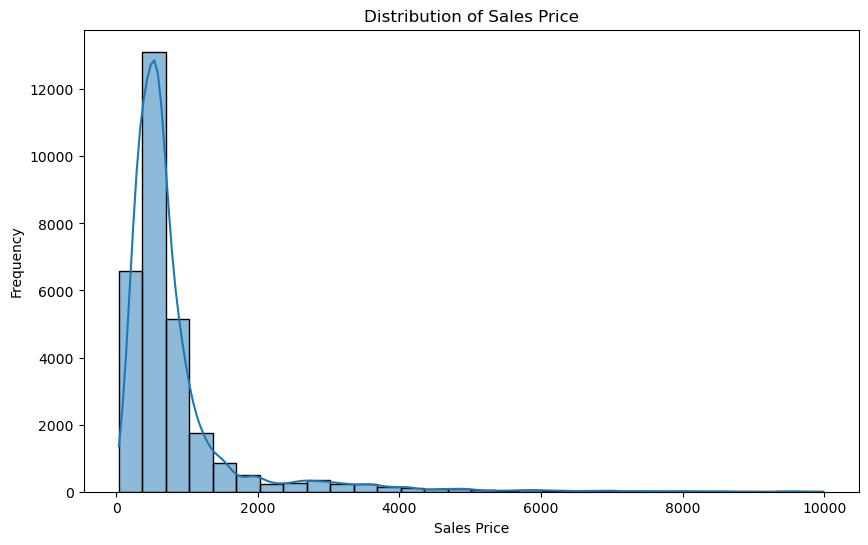

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sales_price'], bins=30, kde=True)
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

In [99]:
correlation = data['sales_price'].corr(data['rating'])
print(correlation)

0.08042476870449074


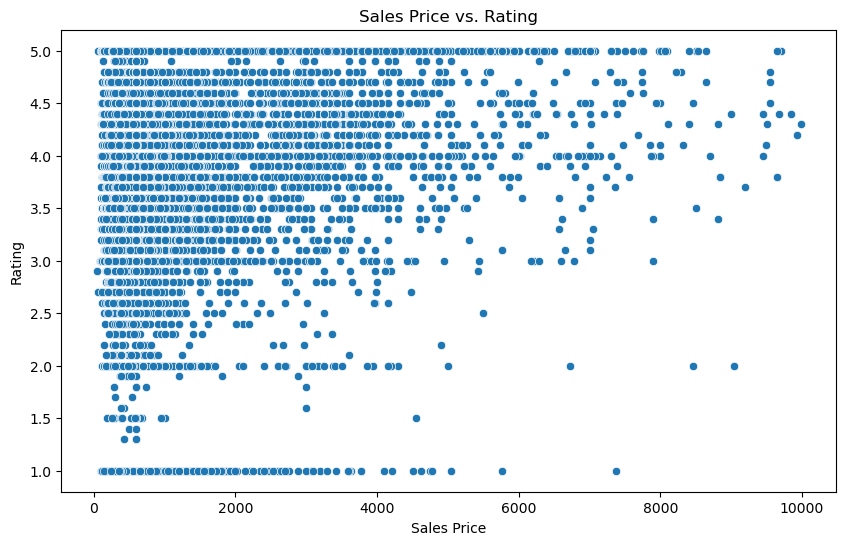

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales_price', y='rating', data=data)
plt.title('Sales Price vs. Rating')
plt.xlabel('Sales Price')
plt.ylabel('Rating')
plt.show()

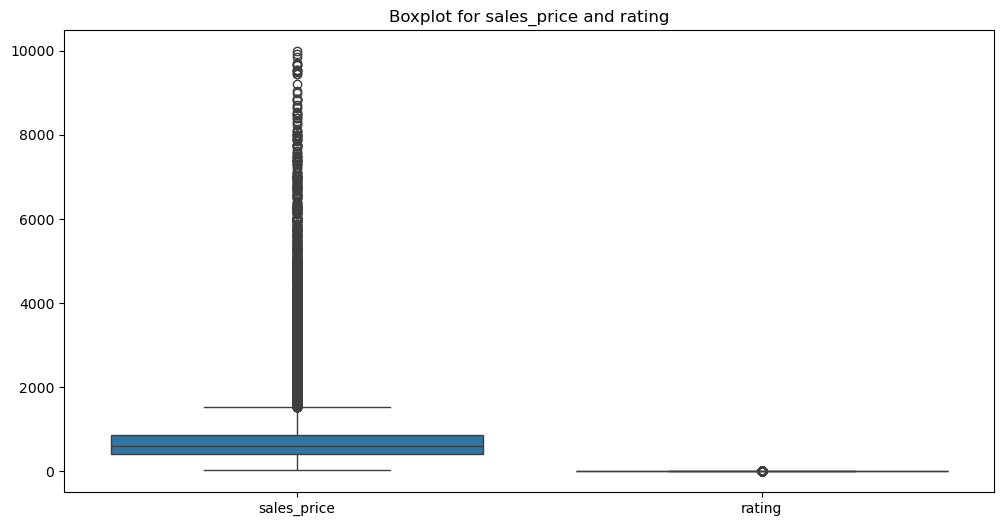

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['sales_price', 'rating']])
plt.title('Boxplot for sales_price and rating')
plt.show()

In [102]:


# Download the stopwords resource (only once)
nltk.download('stopwords')
nltk.download('punkt')

# Function to remove stop words
def remove_stop_words(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Get the list of stop words in English
    stop_words = set(stopwords.words('english'))
    
    # Remove stop words from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Reconstruct the text from filtered words
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text

# Apply the stop word removal to the 'product_name' column
data['product_name'] = data['product_name'].apply(remove_stop_words)

# Print the updated 'product_name' column
print(data['product_name'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        LA ' Facon Cotton Kalamkari Handblock Saree Bl...
1        Sf Jeans Pantaloons Men 's Plain Slim fit T-Shirt
2        LOVISTA Cotton Gota Patti Tassel Traditional P...
3                People Men 's Printed Regular fit T-Shirt
4        Monte Carlo Grey Solid Cotton Blend Polo Colla...
                               ...                        
29995         Indian Virasat Women 's Rayon Anarkali Kurta
29996      Urban Ranger Pantaloons Men 's Slim fit T-Shirt
29997             Peter England Men 's Regular fit T-Shirt
29998    PINKY PARI Women 's Embroidered Short Denim St...
29999        Gutsy Men 's Full Sleeve Printed Navy T-Shirt
Name: product_name, Length: 30000, dtype: object


In [103]:
import re

def remove_non_english_letters_and_numbers(text):
    # Regular expression to remove non-English letters and non-numeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9]', '', text)
    return cleaned_text

# Assuming 'data' is a DataFrame
data['product_name'] = data['product_name'].apply(remove_non_english_letters_and_numbers)

# Now print the modified 'product_name' column
print(data['product_name'])


0        LAFaconCottonKalamkariHandblockSareeBlouseFabr...
1                  SfJeansPantaloonsMensPlainSlimfitTShirt
2        LOVISTACottonGotaPattiTasselTraditionalPrinted...
3                        PeopleMensPrintedRegularfitTShirt
4        MonteCarloGreySolidCottonBlendPoloCollarTracksuit
                               ...                        
29995                IndianVirasatWomensRayonAnarkaliKurta
29996               UrbanRangerPantaloonsMensSlimfitTShirt
29997                     PeterEnglandMensRegularfitTShirt
29998    PINKYPARIWomensEmbroideredShortDenimStraightfi...
29999                 GutsyMensFullSleevePrintedNavyTShirt
Name: product_name, Length: 30000, dtype: object


In [104]:
import re

def expand_contractions(text):
    # Expanded dictionary of common contractions and their expansions
    contractions = {
        "i've": "I have",
        "i'm": "I am",
        "you're": "you are",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "we're": "we are",
        "they're": "they are",
        "can't": "cannot",
        "won't": "will not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "hasn't": "has not",
        "haven't": "have not",
        "hadn't": "had not",
        "mightn't": "might not",
        "mustn't": "must not",
        "needn't": "need not",
        "shan't": "shall not",
        "shouldn't": "should not",
        "couldn't": "could not",
        "wouldn't": "would not",
        "let's": "let us",
        "that's": "that is",
        "what's": "what is",
        "who's": "who is",
        "where's": "where is",
        "why's": "why is",
        "how's": "how is",
        "here's": "here is",
        "there's": "there is",
        "who'd": "who would",
        "i'd": "I would",
        "you'd": "you would",
        "he'd": "he would",
        "she'd": "she would",
        "we'd": "we would",
        "they'd": "they would",
    }

    # Regular expression to match contractions
    contraction_pattern = re.compile(r'\b(?:' + '|'.join(contractions.keys()) + r')\b')

    # Function to replace contractions with their full forms
    def replace_contraction(match):
        return contractions[match.group(0).lower()]

    # Replace contractions in the text
    expanded_text = contraction_pattern.sub(replace_contraction, text)

    return expanded_text

# Apply contraction expansion to 'product_name' column
data['product_name'] = data['product_name'].apply(expand_contractions)

# Print the updated 'product_name' column
print(data['product_name'])


0        LAFaconCottonKalamkariHandblockSareeBlouseFabr...
1                  SfJeansPantaloonsMensPlainSlimfitTShirt
2        LOVISTACottonGotaPattiTasselTraditionalPrinted...
3                        PeopleMensPrintedRegularfitTShirt
4        MonteCarloGreySolidCottonBlendPoloCollarTracksuit
                               ...                        
29995                IndianVirasatWomensRayonAnarkaliKurta
29996               UrbanRangerPantaloonsMensSlimfitTShirt
29997                     PeterEnglandMensRegularfitTShirt
29998    PINKYPARIWomensEmbroideredShortDenimStraightfi...
29999                 GutsyMensFullSleevePrintedNavyTShirt
Name: product_name, Length: 30000, dtype: object


In [132]:

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary resources (only once)

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [134]:
"""# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to perform stemming and lemmatization
def stem_and_lemmatize(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform stemming and lemmatization on each word
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Reconstruct the text with stemmed and lemmatized words
    stemmed_text = ' '.join(stemmed_words)
    lemmatized_text = ' '.join(lemmatized_words)
    
    return stemmed_text, lemmatized_text


data['stemmed_product_name'], data['lemmatized_product_name'] = zip(*data['product_name'].apply(stem_and_lemmatize))

# Print the updated DataFrame
print(data[['product_name', 'stemmed_product_name', 'lemmatized_product_name']].head())"""

                                        product_name  \
0  LAFaconCottonKalamkariHandblockSareeBlouseFabr...   
1            SfJeansPantaloonsMensPlainSlimfitTShirt   
2  LOVISTACottonGotaPattiTasselTraditionalPrinted...   
3                  PeopleMensPrintedRegularfitTShirt   
4  MonteCarloGreySolidCottonBlendPoloCollarTracksuit   

                                stemmed_product_name  \
0  lafaconcottonkalamkarihandblocksareeblousefabr...   
1            sfjeanspantaloonsmensplainslimfittshirt   
2  lovistacottongotapattitasseltraditionalprinted...   
3                  peoplemensprintedregularfittshirt   
4  montecarlogreysolidcottonblendpolocollartracksuit   

                             lemmatized_product_name  
0  LAFaconCottonKalamkariHandblockSareeBlouseFabr...  
1            SfJeansPantaloonsMensPlainSlimfitTShirt  
2  LOVISTACottonGotaPattiTasselTraditionalPrinted...  
3                  PeopleMensPrintedRegularfitTShirt  
4  MonteCarloGreySolidCottonBlendPoloCollarTracksui

In [140]:

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary resources (only once)
nltk.download('punkt')

# Initialize stemmer
stemmer = PorterStemmer()

# Function to apply stemming to product name
def apply_stemming(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform stemming on each word
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Reconstruct the text from stemmed words
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

# Apply the stemming function to 'product_name' column
data['product_name'] = data['product_name'].apply(apply_stemming)

# Print the updated 'product_name' column with stemmed product names
print(data[['product_name']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        product_name
0  lafaconcottonkalamkarihandblocksareeblousefabr...
1            sfjeanspantaloonsmensplainslimfittshirt
2  lovistacottongotapattitasseltraditionalprinted...
3                  peoplemensprintedregularfittshirt
4  montecarlogreysolidcottonblendpolocollartracksuit


In [146]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary resources (only once)
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to product name
def apply_lemmatization(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform lemmatization on each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Reconstruct the text from lemmatized words
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

# Apply the lemmatization function to 'product_name' column
data['product_name'] = data['product_name'].apply(apply_lemmatization)

# Print the updated 'product_name' column with lemmatized product names
print(data[['product_name']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        product_name
0  lafaconcottonkalamkarihandblocksareeblousefabr...
1            sfjeanspantaloonsmensplainslimfittshirt
2  lovistacottongotapattitasseltraditionalprinted...
3                  peoplemensprintedregularfittshirt
4  montecarlogreysolidcottonblendpolocollartracksuit
